In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
df = pd.read_csv('/content/1000_richest_people_in_the_world.csv')
df.head()

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


In [36]:
df.rename(columns = {'Net worth (in billions)': 'Net_worth'}, inplace = True)

In [6]:
df.shape

(1000, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1000 non-null   object 
 1   Country                  1000 non-null   object 
 2   Industry                 1000 non-null   object 
 3   Net Worth (in billions)  1000 non-null   float64
 4   Company                  1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [8]:
df.isna().sum()

Name                       0
Country                    0
Industry                   0
Net Worth (in billions)    0
Company                    0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Net Worth (in billions),1000.0,102.61627,56.796062,1.57,54.96,103.365,151.9125,199.24


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

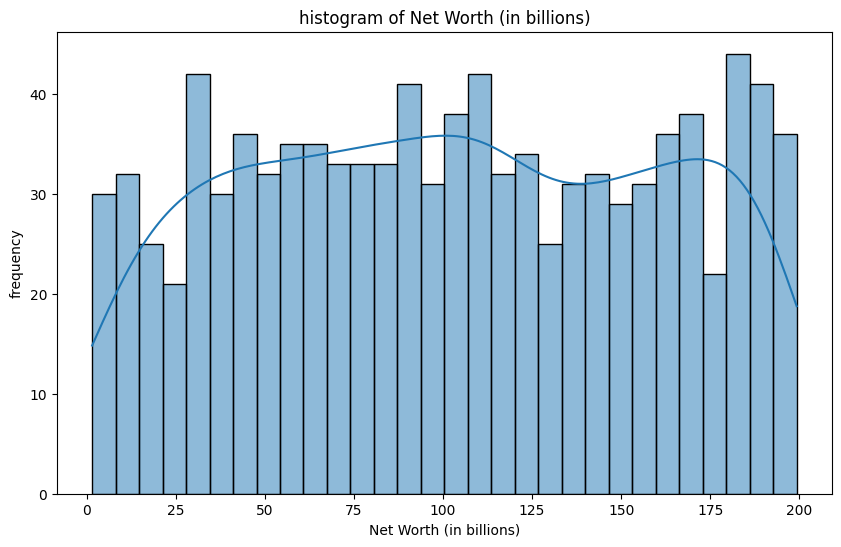

In [43]:
numeric_features = ['Net Worth (in billions)']

for feature in numeric_features:
    if feature in df.columns:
     plt.figure(figsize =(10,6))
     sns.histplot(df[feature], kde = True, bins = 30)
     plt.title(f'histogram of {feature}')
     plt.xlabel(feature)
     plt.ylabel('frequency')
     plt.show()


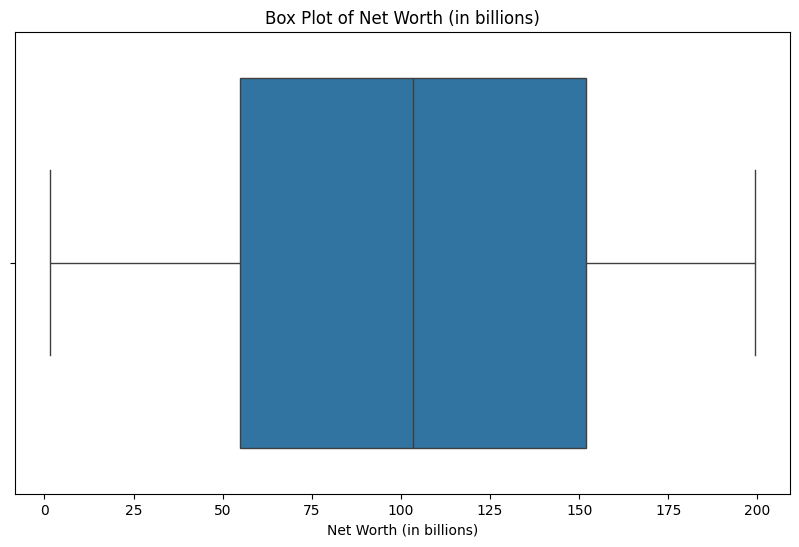

In [44]:
for feature in numeric_features:
  if feature in df.columns:
   plt.figure(figsize = (10,6))
   sns.boxplot(x =df[feature])
   plt.title(f'Box Plot of {feature}')
   plt.xlabel(feature)
   plt.show()

In [58]:
top_10_richest = df.nlargest(10, "Net Worth (in billions)")
#if feature in df.columns:
top_10_richest

,Name,Country,Industry,Net Worth (in billions),Company
616,Steve Ballmer,USA,Retail,199.24,Facebook
584,Larry Ellison,USA,Finance,199.21,Grupo Carso
115,Amancio Ortega,France,Retail,199.20,L'Oreal
913,Alice Walton,USA,Technology,199.10,Microsoft
91,Larry Ellison,USA,Manufacturing,199.00,Walmart
667,Mukesh Ambani,India,Manufacturing,198.77,Microsoft
915,Bernard Arnault,USA,Retail,198.34,Oracle
377,Sergey Brin,India,Technology,198.05,Walmart
962,Carlos Slim,USA,Petrochemicals,198.05,Microsoft
376,Jeff Bezos,Mexico,Petrochemicals,197.60,Walmart


<ipython-input-60-3412d0a71a82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y =industry_count.index ,x=industry_count.values, palette='cividis')


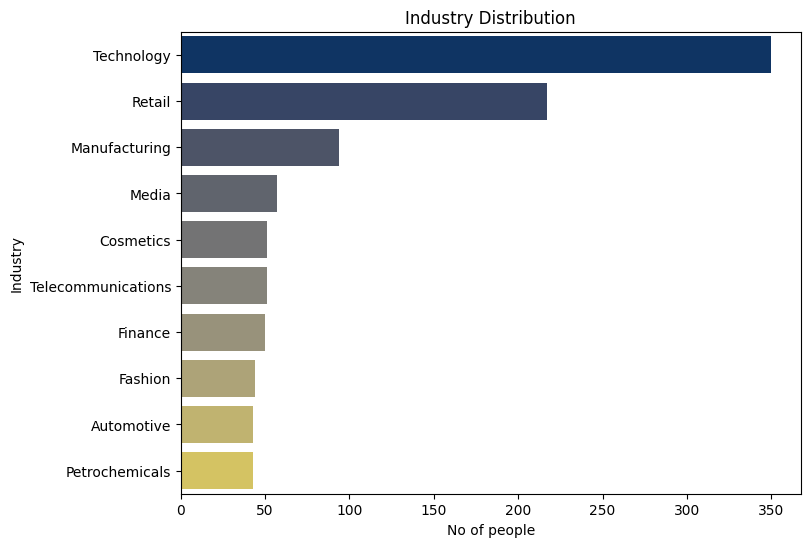

In [60]:
plt.figure(figsize=(8,6))
industry_count = df['Industry'].value_counts()
sns.barplot(y =industry_count.index ,x=industry_count.values, palette='cividis')
plt.title('Industry Distribution')
plt.xlabel('No of people')
plt.ylabel('Industry')
plt.show()

<ipython-input-64-5d953b82c301>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_count.index, x =country_count.values, palette='cividis')


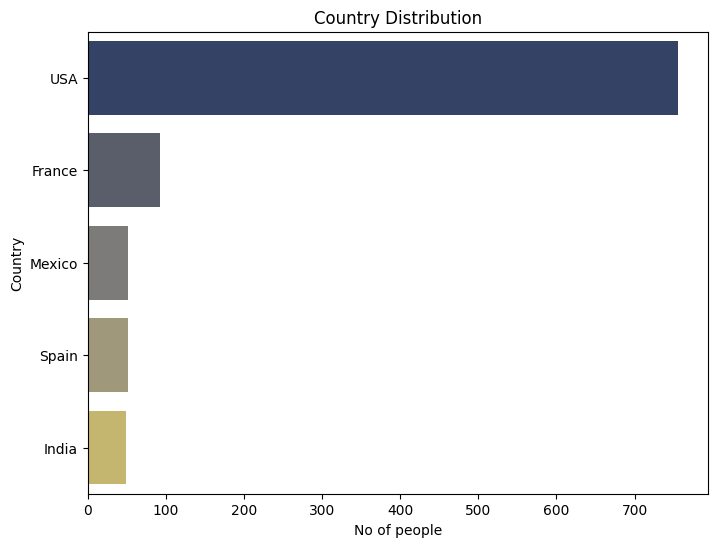

In [64]:
plt.figure(figsize=(8,6))
country_count=df['Country'].value_counts().head()
sns.barplot(y=country_count.index, x =country_count.values, palette='cividis')
plt.title('Country Distribution')
plt.xlabel('No of people')
plt.ylabel('Country')
plt.show()

<ipython-input-67-f7904f920a72>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_net_worth.index,x=industry_net_worth.values, palette='cividis')


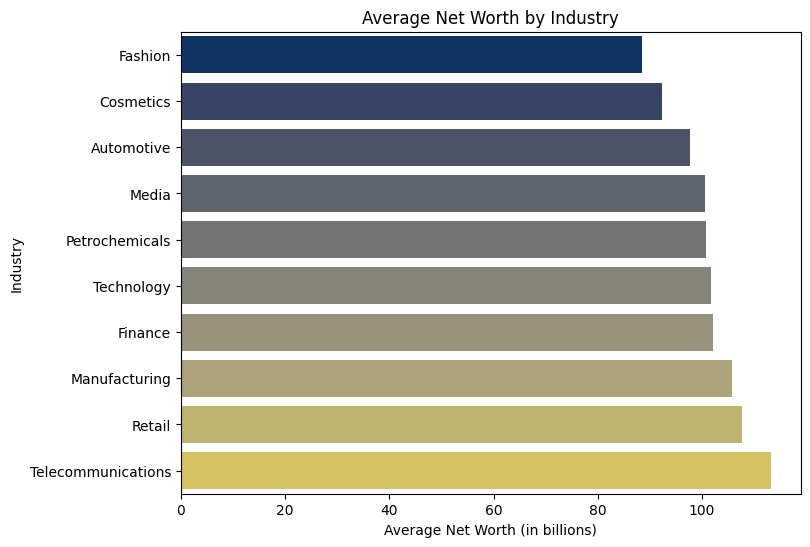

In [67]:
plt.figure(figsize=(8,6))
industry_net_worth = df.groupby('Industry')['Net Worth (in billions)'].mean().sort_values()
sns.barplot(y=industry_net_worth.index,x=industry_net_worth.values, palette='cividis')
plt.title('Average Net Worth by Industry')
plt.xlabel('Average Net Worth (in billions)')
plt.ylabel('Industry')
plt.show()

<ipython-input-72-efd9da86018e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y= country_net_worth.index, x = country_net_worth.values, palette='plasma')


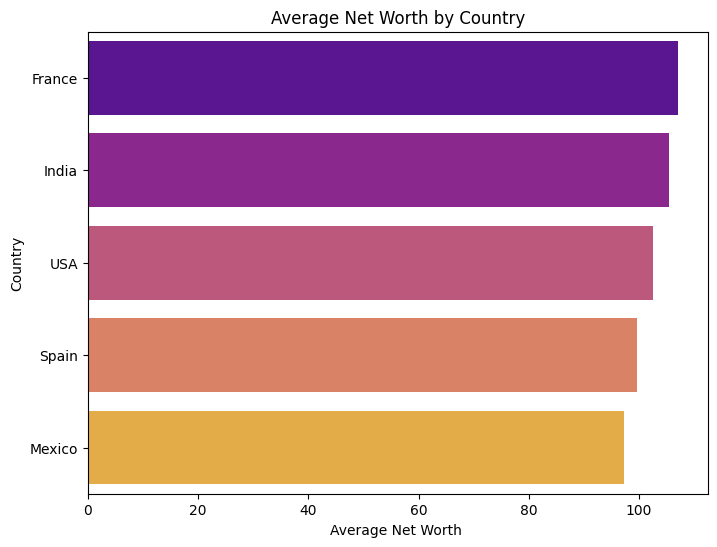

In [72]:
plt.figure(figsize = (8,6))
country_net_worth = df.groupby('Country')['Net Worth (in billions)'].mean().sort_values(ascending = False)
sns.barplot(y= country_net_worth.index, x = country_net_worth.values, palette='plasma')
plt.title('Average Net Worth by Country')
plt.xlabel('Average Net Worth ')
plt.ylabel('Country')
plt.show()

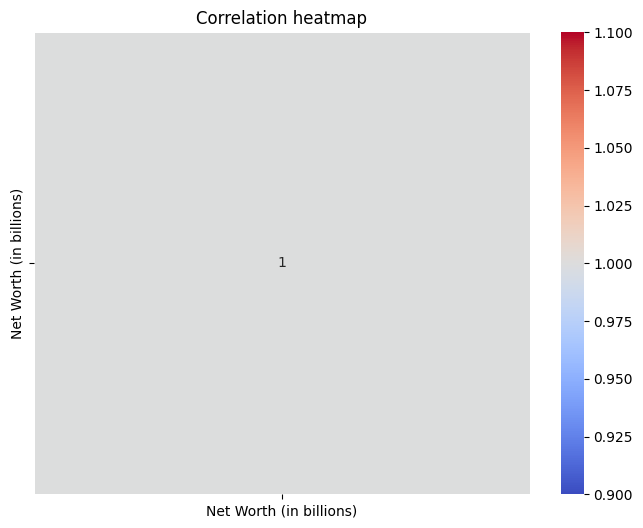

In [74]:
numeric_df = df.select_dtypes(include = ['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize= (8,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Correlation heatmap')
plt.show()

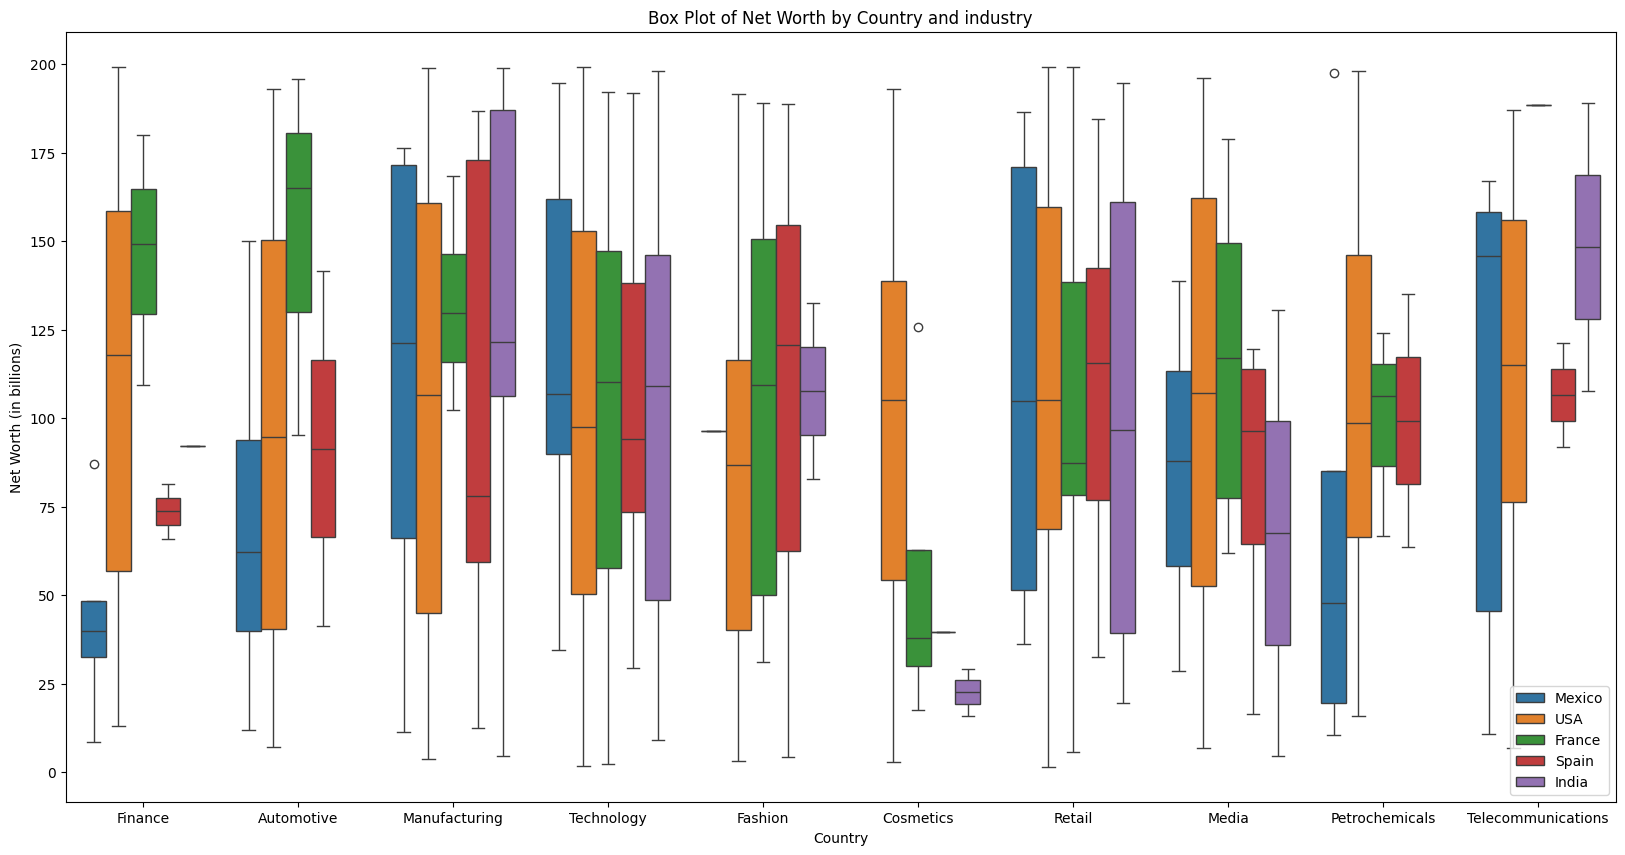

In [98]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = 'Industry', y='Net Worth (in billions)', hue='Country')
plt.title('Box Plot of Net Worth by Country and industry')
plt.xlabel('Country')
plt.ylabel('Net Worth (in billions)')
plt.legend(loc = 'lower right')
plt.show()

In [84]:
richest_by_country = df.loc[df.groupby('Country')['Net Worth (in billions)'].idxmax()]
richest_by_country

,Name,Country,Industry,Net Worth (in billions),Company
115,Amancio Ortega,France,Retail,199.20,L'Oreal
667,Mukesh Ambani,India,Manufacturing,198.77,Microsoft
376,Jeff Bezos,Mexico,Petrochemicals,197.60,Walmart
503,Larry Ellison,Spain,Technology,191.89,Walmart
616,Steve Ballmer,USA,Retail,199.24,Facebook


In [88]:
richest_by_industry = df.loc[df.groupby('Industry')['Net Worth (in billions)'].idxmax()]
richest_by_industry

,Name,Country,Industry,Net Worth (in billions),Company
862,Mukesh Ambani,France,Automotive,195.84,L'Oreal
895,Jim Walton,USA,Cosmetics,192.98,L'Oreal
726,Bill Gates,USA,Fashion,191.42,Koch Industries
584,Larry Ellison,USA,Finance,199.21,Grupo Carso
91,Larry Ellison,USA,Manufacturing,199.00,Walmart
293,Rob Walton,USA,Media,196.03,Google
962,Carlos Slim,USA,Petrochemicals,198.05,Microsoft
616,Steve Ballmer,USA,Retail,199.24,Facebook
913,Alice Walton,USA,Technology,199.10,Microsoft
561,Larry Ellison,India,Telecommunications,189.10,Reliance Industries


<ipython-input-95-817e875b9186>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = company_avg_net_worth.index, x = company_avg_net_worth.values, palette ='magma')


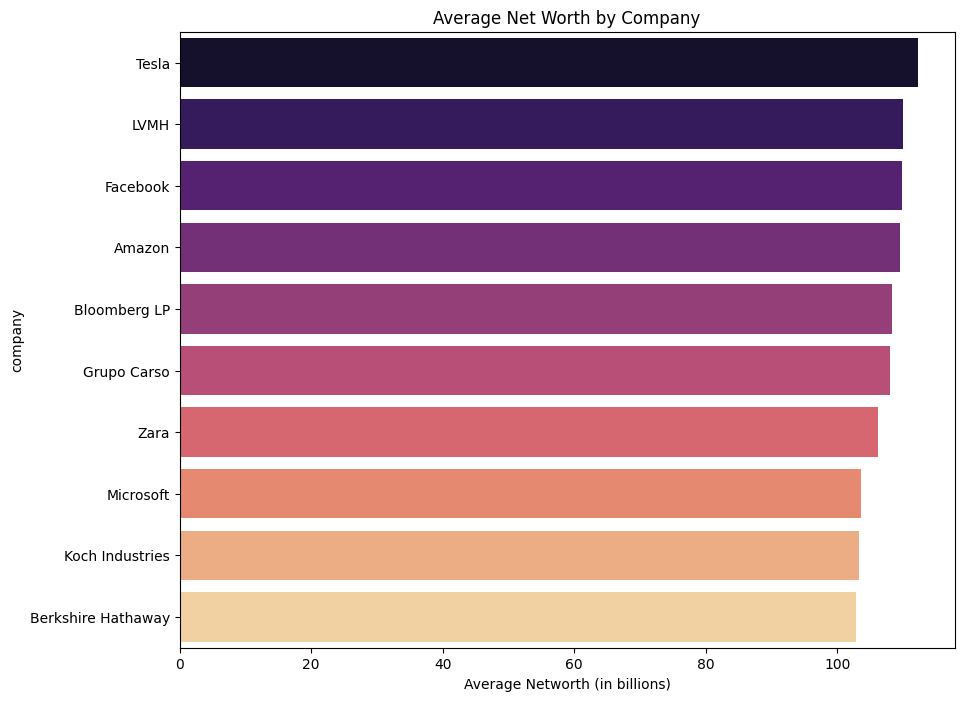

In [95]:
plt.figure(figsize=(10,8))
company_avg_net_worth = df.groupby('Company')['Net Worth (in billions)'].mean().sort_values(ascending =False).head(10)
sns.barplot(y = company_avg_net_worth.index, x = company_avg_net_worth.values, palette ='magma')
plt.title('Average Net Worth by Company')
plt.xlabel('Average Networth (in billions)')
plt.ylabel('company')
plt.show()


<ipython-input-96-c40e37b7e267>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_companies.index, x = top_companies.values, palette = 'cividis')


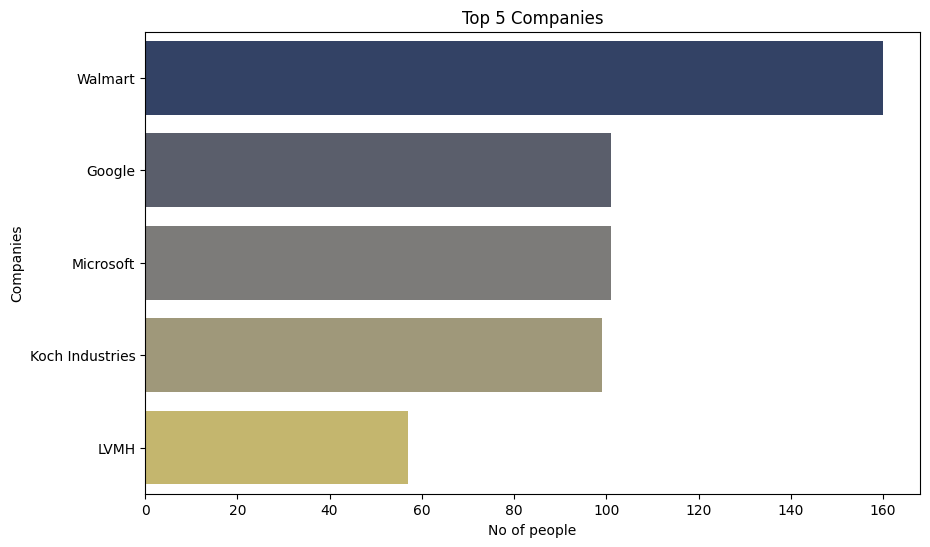

In [96]:
plt.figure(figsize =(10, 6))
top_companies = df['Company'].value_counts().head(5)
sns.barplot(y = top_companies.index, x = top_companies.values, palette = 'cividis')
plt.title('Top 5 Companies')
plt.xlabel('No of people')
plt.ylabel('Companies')
plt.show()

<ipython-input-100-d19ab867482e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = avg_networth_by_industry.index, x=avg_networth_by_industry.values, palette = 'magma')


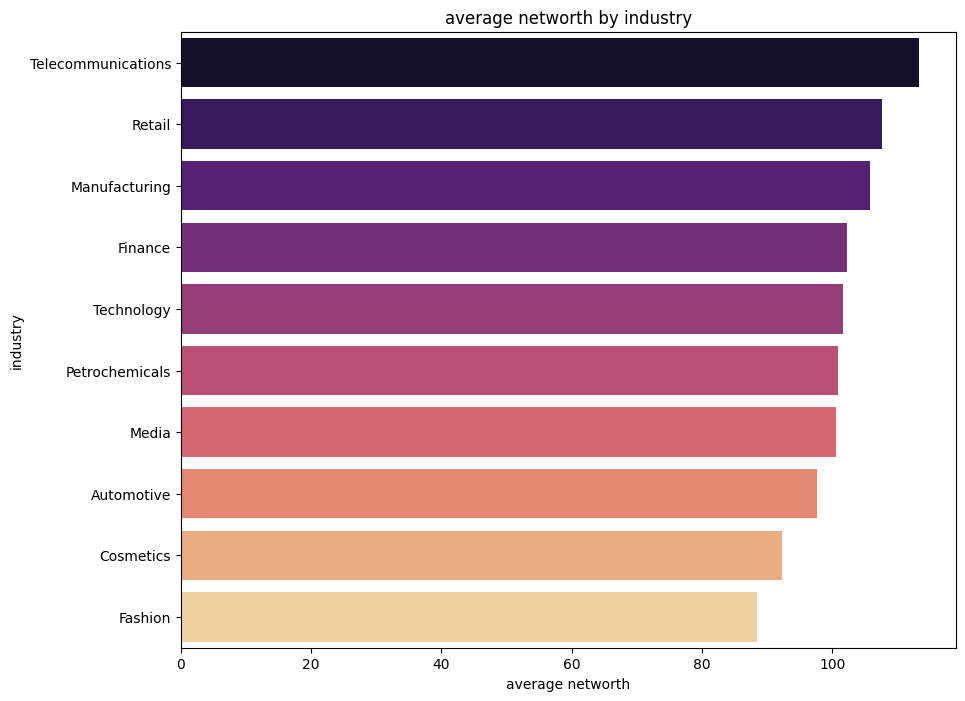

In [100]:
plt.figure(figsize =(10,8))
avg_networth_by_industry = df.groupby('Industry')['Net Worth (in billions)'].mean().sort_values(ascending = False)
sns.barplot(y = avg_networth_by_industry.index, x=avg_networth_by_industry.values, palette = 'magma')
plt.title('average networth by industry')
plt.xlabel('average networth')
plt.ylabel('industry')
plt.show()

<ipython-input-102-80dad5a6c826>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_country_with_representative.index, x= top_country_with_representative.values, palette = 'cividis')


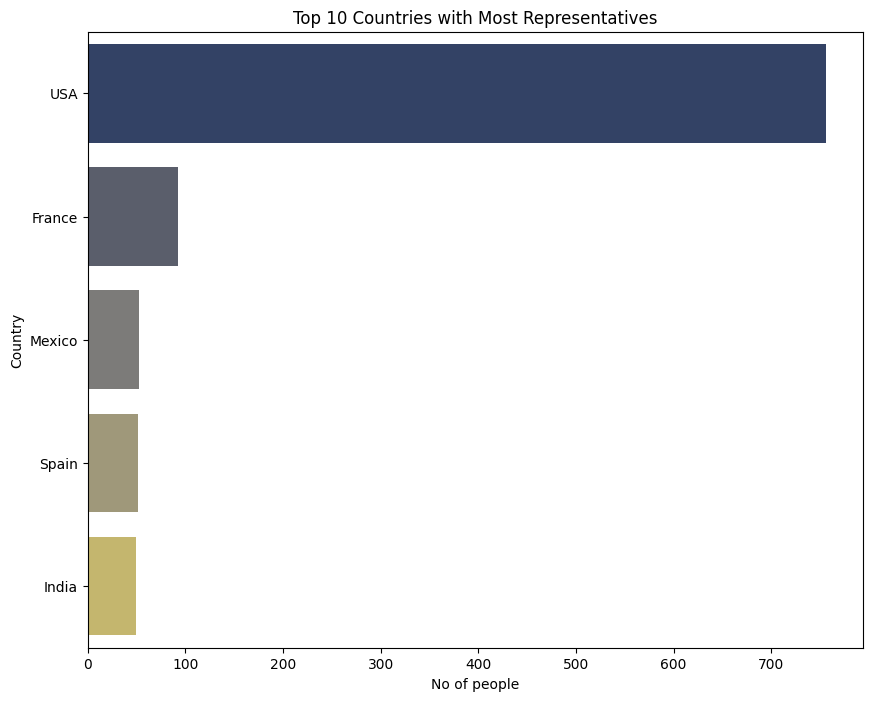

In [102]:
plt.figure(figsize = (10, 8))
top_country_with_representative = df['Country'].value_counts().head(10)
sns.barplot(y = top_country_with_representative.index, x= top_country_with_representative.values, palette = 'cividis')
plt.title('Top 10 Countries with Most Representatives')
plt.xlabel('No of people')
plt.ylabel('Country')
plt.show()